# Toy model for UHECR track generation

In [1]:
%matplotlib inline
from generate_sample_frames import *

genarated 100 frames of background
displaying a random sample of 10 frames: 


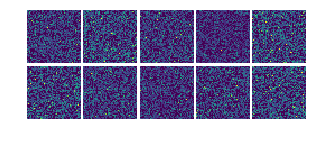

generated 100 frames of tracks
displaying a random sample of 10 frames: 


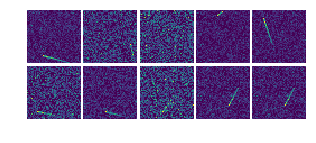

saved generated frames to file in samples/


In [2]:
# set up the TrackModel
track_model = TrackModel()
track_model.mu_c = 10

# generate sample background and tracks
with SampleGenerator(track_model) as generator:
    generator.background()
    generator.tracks()
    generator.save()